In [56]:
GPU_device_id = str(3)
model_id_save_as = 'daepretrain-full-final'
architecture_id = 'final-models/learningcurve-dnn-full-final-features'
model_class_id = 'DAE'
training_dataset_id = '../dataset_generation/hyperparametersearch_dataset_200keV_full_log10time_1000.npy'
difficulty_setting = 'full'

earlystop_patience = 50
num_epochs = 2000

In [16]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_device_id


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelBinarizer
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
import tensorflow as tf
import pickle
import numpy as np
import pandas as pd
from random import choice

from numpy.random import seed
seed(5)
from tensorflow import set_random_seed
set_random_seed(5)



#### Import model, training function 

In [17]:
from annsa.model_classes import build_dae_model, compile_model, mean_normalized_kl_divergence
from annsa.load_dataset import load_easy, load_full, dataset_to_spectrakeys
from annsa.load_pretrained_network import load_features

## Training Data Construction

In [18]:
training_dataset = np.load(training_dataset_id, allow_pickle=True)
training_source_spectra, training_background_spectra, training_keys = dataset_to_spectrakeys(training_dataset,
                                                                                             sampled=False,
                                                                                             separate_background=True)

## Load Model

In [19]:
model_features = load_features(architecture_id)
model_features.loss = tf.keras.losses.mean_squared_error
model_features.optimizer = tf.keras.optimizers.Adam
model_features.learning_rate = model_features.learining_rate
model_features.input_dim = 1024

In [20]:
dae_features = model_features.to_dae_model_features()
dae_features.metrics = ['mse']

## Train network

# Scale input data

In [21]:
training_input = np.random.poisson(training_source_spectra+training_background_spectra)
training_output = training_source_spectra

training_input = dae_features.scaler.transform(training_input)
training_output = dae_features.scaler.transform(training_output)


/home/ubuntu/anaconda3/envs/tensorflow_p36_update/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:161: RuntimeWarning: invalid value encountered in sqrt
  **(kw_args if kw_args else {}))


In [22]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',
    patience=earlystop_patience,
    mode='min',
    restore_best_weights=True)

csv_logger = tf.keras.callbacks.CSVLogger('./final-models-keras/'+model_id_save_as+'.log')

In [23]:
mlb=LabelBinarizer()
model = compile_model(
            build_dae_model,
            dae_features)

output = model.fit(
    x=training_input,
    y=training_output,
    batch_size=model_features.batch_size,
    validation_split=0.1,
    epochs=500,
    verbose=1,
    shuffle=True,
    callbacks=[earlystop_callback, ],
)


Train on 27000 samples, validate on 3000 samples
Epoch 1/500
27000/27000 [==============================] - 1s 27us/sample - loss: 140.0044 - mean_squared_error: 140.0044 - val_loss: 41.5876 - val_mean_squared_error: 41.5876
Epoch 2/500
27000/27000 [==============================] - 0s 17us/sample - loss: 50.9727 - mean_squared_error: 50.9728 - val_loss: 28.9551 - val_mean_squared_error: 28.9551
Epoch 3/500
27000/27000 [==============================] - 0s 17us/sample - loss: 33.7771 - mean_squared_error: 33.7771 - val_loss: 21.9606 - val_mean_squared_error: 21.9606
Epoch 4/500
27000/27000 [==============================] - 0s 17us/sample - loss: 25.1494 - mean_squared_error: 25.1494 - val_loss: 20.1289 - val_mean_squared_error: 20.1289
Epoch 5/500
27000/27000 [==============================] - 0s 17us/sample - loss: 20.3494 - mean_squared_error: 20.3494 - val_loss: 18.3879 - val_mean_squared_error: 18.3879
Epoch 6/500
27000/27000 [==============================] - 0s 17us/sample - los

27000/27000 [==============================] - 0s 17us/sample - loss: 6.0648 - mean_squared_error: 6.0648 - val_loss: 12.3285 - val_mean_squared_error: 12.3285
Epoch 20/500
27000/27000 [==============================] - 0s 17us/sample - loss: 5.8705 - mean_squared_error: 5.8705 - val_loss: 12.6493 - val_mean_squared_error: 12.6493
Epoch 21/500
27000/27000 [==============================] - 0s 17us/sample - loss: 5.7008 - mean_squared_error: 5.7008 - val_loss: 12.2729 - val_mean_squared_error: 12.2729
Epoch 22/500
27000/27000 [==============================] - 0s 17us/sample - loss: 5.5014 - mean_squared_error: 5.5014 - val_loss: 11.9705 - val_mean_squared_error: 11.9705
Epoch 23/500
27000/27000 [==============================] - 0s 17us/sample - loss: 5.3387 - mean_squared_error: 5.3387 - val_loss: 11.8219 - val_mean_squared_error: 11.8219
Epoch 24/500
27000/27000 [==============================] - 0s 17us/sample - loss: 5.1915 - mean_squared_error: 5.1915 - val_loss: 11.4737 - val_mea

27000/27000 [==============================] - 0s 17us/sample - loss: 3.7808 - mean_squared_error: 3.7808 - val_loss: 9.9967 - val_mean_squared_error: 9.9967
Epoch 39/500
27000/27000 [==============================] - 0s 17us/sample - loss: 3.7222 - mean_squared_error: 3.7222 - val_loss: 9.6910 - val_mean_squared_error: 9.6910
Epoch 40/500
27000/27000 [==============================] - 0s 17us/sample - loss: 3.6331 - mean_squared_error: 3.6331 - val_loss: 9.4916 - val_mean_squared_error: 9.4916
Epoch 41/500
27000/27000 [==============================] - 0s 17us/sample - loss: 3.5796 - mean_squared_error: 3.5796 - val_loss: 9.5043 - val_mean_squared_error: 9.5043
Epoch 42/500
27000/27000 [==============================] - 0s 17us/sample - loss: 3.5173 - mean_squared_error: 3.5173 - val_loss: 9.4863 - val_mean_squared_error: 9.4863
Epoch 43/500
27000/27000 [==============================] - 0s 17us/sample - loss: 3.4533 - mean_squared_error: 3.4533 - val_loss: 9.2803 - val_mean_squared_e

27000/27000 [==============================] - 0s 17us/sample - loss: 2.8266 - mean_squared_error: 2.8266 - val_loss: 7.9607 - val_mean_squared_error: 7.9607
Epoch 58/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.7916 - mean_squared_error: 2.7916 - val_loss: 8.0021 - val_mean_squared_error: 8.0021
Epoch 59/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.7575 - mean_squared_error: 2.7575 - val_loss: 7.7708 - val_mean_squared_error: 7.7708
Epoch 60/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.7313 - mean_squared_error: 2.7313 - val_loss: 7.7376 - val_mean_squared_error: 7.7376
Epoch 61/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.7076 - mean_squared_error: 2.7076 - val_loss: 7.7942 - val_mean_squared_error: 7.7942
Epoch 62/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.7120 - mean_squared_error: 2.7120 - val_loss: 7.4725 - val_mean_squared_e

27000/27000 [==============================] - 0s 17us/sample - loss: 2.3750 - mean_squared_error: 2.3750 - val_loss: 6.7924 - val_mean_squared_error: 6.7924
Epoch 77/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.3188 - mean_squared_error: 2.3188 - val_loss: 6.9921 - val_mean_squared_error: 6.9921
Epoch 78/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.2972 - mean_squared_error: 2.2972 - val_loss: 6.9610 - val_mean_squared_error: 6.9610
Epoch 79/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.3229 - mean_squared_error: 2.3229 - val_loss: 6.8290 - val_mean_squared_error: 6.8290
Epoch 80/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.2334 - mean_squared_error: 2.2334 - val_loss: 6.9527 - val_mean_squared_error: 6.9527
Epoch 81/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.2284 - mean_squared_error: 2.2284 - val_loss: 6.9377 - val_mean_squared_e

27000/27000 [==============================] - 0s 17us/sample - loss: 2.0155 - mean_squared_error: 2.0155 - val_loss: 6.7260 - val_mean_squared_error: 6.7260
Epoch 96/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.0063 - mean_squared_error: 2.0063 - val_loss: 6.4855 - val_mean_squared_error: 6.4855
Epoch 97/500
27000/27000 [==============================] - 0s 17us/sample - loss: 2.0651 - mean_squared_error: 2.0651 - val_loss: 6.5986 - val_mean_squared_error: 6.5986
Epoch 98/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.9668 - mean_squared_error: 1.9668 - val_loss: 6.4351 - val_mean_squared_error: 6.4351
Epoch 99/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.9743 - mean_squared_error: 1.9743 - val_loss: 6.4714 - val_mean_squared_error: 6.4714
Epoch 100/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.9693 - mean_squared_error: 1.9693 - val_loss: 6.5487 - val_mean_squared_

27000/27000 [==============================] - 0s 17us/sample - loss: 1.8050 - mean_squared_error: 1.8050 - val_loss: 6.0651 - val_mean_squared_error: 6.0651
Epoch 115/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.8036 - mean_squared_error: 1.8036 - val_loss: 6.6783 - val_mean_squared_error: 6.6783
Epoch 116/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.8463 - mean_squared_error: 1.8463 - val_loss: 6.2568 - val_mean_squared_error: 6.2568
Epoch 117/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.8021 - mean_squared_error: 1.8021 - val_loss: 6.0474 - val_mean_squared_error: 6.0474
Epoch 118/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.7771 - mean_squared_error: 1.7771 - val_loss: 6.3563 - val_mean_squared_error: 6.3563
Epoch 119/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.7497 - mean_squared_error: 1.7497 - val_loss: 6.3506 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.6686 - mean_squared_error: 1.6686 - val_loss: 5.8709 - val_mean_squared_error: 5.8709
Epoch 134/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.7120 - mean_squared_error: 1.7120 - val_loss: 6.0244 - val_mean_squared_error: 6.0244
Epoch 135/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.6365 - mean_squared_error: 1.6365 - val_loss: 6.0509 - val_mean_squared_error: 6.0509
Epoch 136/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.6399 - mean_squared_error: 1.6399 - val_loss: 6.3643 - val_mean_squared_error: 6.3643
Epoch 137/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.6672 - mean_squared_error: 1.6672 - val_loss: 6.3297 - val_mean_squared_error: 6.3297
Epoch 138/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.6127 - mean_squared_error: 1.6127 - val_loss: 5.9907 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.5197 - mean_squared_error: 1.5197 - val_loss: 5.9539 - val_mean_squared_error: 5.9539
Epoch 153/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.5202 - mean_squared_error: 1.5202 - val_loss: 5.9129 - val_mean_squared_error: 5.9129
Epoch 154/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.5425 - mean_squared_error: 1.5425 - val_loss: 6.0521 - val_mean_squared_error: 6.0521
Epoch 155/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.5150 - mean_squared_error: 1.5150 - val_loss: 6.1966 - val_mean_squared_error: 6.1966
Epoch 156/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.4989 - mean_squared_error: 1.4989 - val_loss: 6.3862 - val_mean_squared_error: 6.3862
Epoch 157/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.5143 - mean_squared_error: 1.5143 - val_loss: 5.9660 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.4229 - mean_squared_error: 1.4229 - val_loss: 6.0327 - val_mean_squared_error: 6.0327
Epoch 172/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.4074 - mean_squared_error: 1.4074 - val_loss: 6.0200 - val_mean_squared_error: 6.0200
Epoch 173/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3980 - mean_squared_error: 1.3980 - val_loss: 5.7742 - val_mean_squared_error: 5.7742
Epoch 174/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.4016 - mean_squared_error: 1.4016 - val_loss: 6.0146 - val_mean_squared_error: 6.0146
Epoch 175/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.4226 - mean_squared_error: 1.4226 - val_loss: 5.9690 - val_mean_squared_error: 5.9690
Epoch 176/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3992 - mean_squared_error: 1.3992 - val_loss: 5.9567 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.3504 - mean_squared_error: 1.3504 - val_loss: 5.8838 - val_mean_squared_error: 5.8838
Epoch 191/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3219 - mean_squared_error: 1.3219 - val_loss: 5.5098 - val_mean_squared_error: 5.5098
Epoch 192/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3253 - mean_squared_error: 1.3253 - val_loss: 5.8555 - val_mean_squared_error: 5.8555
Epoch 193/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3175 - mean_squared_error: 1.3175 - val_loss: 6.2009 - val_mean_squared_error: 6.2009
Epoch 194/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3136 - mean_squared_error: 1.3136 - val_loss: 5.9069 - val_mean_squared_error: 5.9069
Epoch 195/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.3258 - mean_squared_error: 1.3258 - val_loss: 5.5743 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.2753 - mean_squared_error: 1.2753 - val_loss: 5.9358 - val_mean_squared_error: 5.9358
Epoch 210/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.2393 - mean_squared_error: 1.2393 - val_loss: 6.5139 - val_mean_squared_error: 6.5139
Epoch 211/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.2286 - mean_squared_error: 1.2286 - val_loss: 6.2719 - val_mean_squared_error: 6.2719
Epoch 212/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.2205 - mean_squared_error: 1.2205 - val_loss: 6.2413 - val_mean_squared_error: 6.2413
Epoch 213/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.2549 - mean_squared_error: 1.2549 - val_loss: 6.2271 - val_mean_squared_error: 6.2271
Epoch 214/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.2435 - mean_squared_error: 1.2435 - val_loss: 5.9954 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.1717 - mean_squared_error: 1.1717 - val_loss: 6.2667 - val_mean_squared_error: 6.2667
Epoch 229/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1994 - mean_squared_error: 1.1994 - val_loss: 6.1003 - val_mean_squared_error: 6.1003
Epoch 230/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1851 - mean_squared_error: 1.1851 - val_loss: 6.2972 - val_mean_squared_error: 6.2972
Epoch 231/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1807 - mean_squared_error: 1.1807 - val_loss: 6.0763 - val_mean_squared_error: 6.0763
Epoch 232/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1722 - mean_squared_error: 1.1722 - val_loss: 5.8825 - val_mean_squared_error: 5.8825
Epoch 233/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1789 - mean_squared_error: 1.1789 - val_loss: 6.7437 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.1212 - mean_squared_error: 1.1212 - val_loss: 6.2194 - val_mean_squared_error: 6.2194
Epoch 248/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1157 - mean_squared_error: 1.1157 - val_loss: 6.5035 - val_mean_squared_error: 6.5035
Epoch 249/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1141 - mean_squared_error: 1.1141 - val_loss: 6.4374 - val_mean_squared_error: 6.4374
Epoch 250/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1389 - mean_squared_error: 1.1389 - val_loss: 6.6055 - val_mean_squared_error: 6.6055
Epoch 251/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.1115 - mean_squared_error: 1.1115 - val_loss: 6.3984 - val_mean_squared_error: 6.3984
Epoch 252/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0995 - mean_squared_error: 1.0995 - val_loss: 6.3618 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.0717 - mean_squared_error: 1.0717 - val_loss: 6.8189 - val_mean_squared_error: 6.8189
Epoch 267/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0676 - mean_squared_error: 1.0676 - val_loss: 7.1951 - val_mean_squared_error: 7.1951
Epoch 268/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0577 - mean_squared_error: 1.0577 - val_loss: 6.6350 - val_mean_squared_error: 6.6350
Epoch 269/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0425 - mean_squared_error: 1.0425 - val_loss: 6.6458 - val_mean_squared_error: 6.6458
Epoch 270/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0710 - mean_squared_error: 1.0710 - val_loss: 7.4276 - val_mean_squared_error: 7.4276
Epoch 271/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0544 - mean_squared_error: 1.0544 - val_loss: 6.9079 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 1.0339 - mean_squared_error: 1.0339 - val_loss: 7.6397 - val_mean_squared_error: 7.6397
Epoch 286/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0536 - mean_squared_error: 1.0536 - val_loss: 7.1917 - val_mean_squared_error: 7.1917
Epoch 287/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0256 - mean_squared_error: 1.0256 - val_loss: 7.0860 - val_mean_squared_error: 7.0860
Epoch 288/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0505 - mean_squared_error: 1.0505 - val_loss: 6.8367 - val_mean_squared_error: 6.8367
Epoch 289/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0868 - mean_squared_error: 1.0868 - val_loss: 7.5570 - val_mean_squared_error: 7.5570
Epoch 290/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0207 - mean_squared_error: 1.0207 - val_loss: 7.2783 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 0.9929 - mean_squared_error: 0.9929 - val_loss: 7.4052 - val_mean_squared_error: 7.4052
Epoch 305/500
27000/27000 [==============================] - 0s 17us/sample - loss: 1.0174 - mean_squared_error: 1.0174 - val_loss: 7.5919 - val_mean_squared_error: 7.5919
Epoch 306/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9739 - mean_squared_error: 0.9739 - val_loss: 8.0750 - val_mean_squared_error: 8.0750
Epoch 307/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9968 - mean_squared_error: 0.9968 - val_loss: 7.5991 - val_mean_squared_error: 7.5991
Epoch 308/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9814 - mean_squared_error: 0.9814 - val_loss: 7.2776 - val_mean_squared_error: 7.2776
Epoch 309/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9793 - mean_squared_error: 0.9793 - val_loss: 8.6579 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 0.9372 - mean_squared_error: 0.9372 - val_loss: 8.1296 - val_mean_squared_error: 8.1296
Epoch 324/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9329 - mean_squared_error: 0.9329 - val_loss: 8.2824 - val_mean_squared_error: 8.2824
Epoch 325/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9342 - mean_squared_error: 0.9342 - val_loss: 8.4780 - val_mean_squared_error: 8.4780
Epoch 326/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9319 - mean_squared_error: 0.9319 - val_loss: 9.1073 - val_mean_squared_error: 9.1073
Epoch 327/500
27000/27000 [==============================] - 0s 18us/sample - loss: 0.9534 - mean_squared_error: 0.9534 - val_loss: 8.1623 - val_mean_squared_error: 8.1623
Epoch 328/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9359 - mean_squared_error: 0.9359 - val_loss: 8.7397 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 0.9729 - mean_squared_error: 0.9729 - val_loss: 9.3753 - val_mean_squared_error: 9.3753
Epoch 343/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9091 - mean_squared_error: 0.9091 - val_loss: 8.5188 - val_mean_squared_error: 8.5188
Epoch 344/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9005 - mean_squared_error: 0.9005 - val_loss: 9.0488 - val_mean_squared_error: 9.0488
Epoch 345/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8996 - mean_squared_error: 0.8996 - val_loss: 8.4027 - val_mean_squared_error: 8.4027
Epoch 346/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.9012 - mean_squared_error: 0.9012 - val_loss: 9.0028 - val_mean_squared_error: 9.0028
Epoch 347/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8984 - mean_squared_error: 0.8984 - val_loss: 9.1148 - val_mean_squa

27000/27000 [==============================] - 0s 17us/sample - loss: 0.8718 - mean_squared_error: 0.8718 - val_loss: 9.2571 - val_mean_squared_error: 9.2571
Epoch 362/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8880 - mean_squared_error: 0.8880 - val_loss: 9.0945 - val_mean_squared_error: 9.0945
Epoch 363/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8860 - mean_squared_error: 0.8860 - val_loss: 10.4085 - val_mean_squared_error: 10.4085
Epoch 364/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8842 - mean_squared_error: 0.8842 - val_loss: 9.7360 - val_mean_squared_error: 9.7360
Epoch 365/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8753 - mean_squared_error: 0.8753 - val_loss: 9.3513 - val_mean_squared_error: 9.3513
Epoch 366/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8769 - mean_squared_error: 0.8769 - val_loss: 9.5535 - val_mean_sq

27000/27000 [==============================] - 0s 17us/sample - loss: 0.8699 - mean_squared_error: 0.8699 - val_loss: 9.4114 - val_mean_squared_error: 9.4114
Epoch 381/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8529 - mean_squared_error: 0.8529 - val_loss: 9.9762 - val_mean_squared_error: 9.9762
Epoch 382/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8736 - mean_squared_error: 0.8736 - val_loss: 9.9351 - val_mean_squared_error: 9.9351
Epoch 383/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8368 - mean_squared_error: 0.8368 - val_loss: 9.8983 - val_mean_squared_error: 9.8983
Epoch 384/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8500 - mean_squared_error: 0.8500 - val_loss: 10.0227 - val_mean_squared_error: 10.0227
Epoch 385/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8628 - mean_squared_error: 0.8628 - val_loss: 11.0705 - val_mean_s

27000/27000 [==============================] - 0s 17us/sample - loss: 0.8412 - mean_squared_error: 0.8412 - val_loss: 11.2369 - val_mean_squared_error: 11.2369
Epoch 400/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8169 - mean_squared_error: 0.8169 - val_loss: 10.3848 - val_mean_squared_error: 10.3848
Epoch 401/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8210 - mean_squared_error: 0.8210 - val_loss: 10.9921 - val_mean_squared_error: 10.9921
Epoch 402/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8217 - mean_squared_error: 0.8217 - val_loss: 11.6274 - val_mean_squared_error: 11.6274
Epoch 403/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8331 - mean_squared_error: 0.8331 - val_loss: 12.0600 - val_mean_squared_error: 12.0600
Epoch 404/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8282 - mean_squared_error: 0.8282 - val_loss: 9.9370 - val

27000/27000 [==============================] - 0s 17us/sample - loss: 0.8110 - mean_squared_error: 0.8110 - val_loss: 10.8007 - val_mean_squared_error: 10.8007
Epoch 418/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8047 - mean_squared_error: 0.8047 - val_loss: 11.5050 - val_mean_squared_error: 11.5050
Epoch 419/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8356 - mean_squared_error: 0.8356 - val_loss: 10.8324 - val_mean_squared_error: 10.8324
Epoch 420/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8213 - mean_squared_error: 0.8213 - val_loss: 11.0789 - val_mean_squared_error: 11.0789
Epoch 421/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.7933 - mean_squared_error: 0.7933 - val_loss: 10.5517 - val_mean_squared_error: 10.5517
Epoch 422/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8122 - mean_squared_error: 0.8122 - val_loss: 11.2096 - va

27000/27000 [==============================] - 0s 17us/sample - loss: 0.7843 - mean_squared_error: 0.7843 - val_loss: 12.0395 - val_mean_squared_error: 12.0395
Epoch 437/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.7863 - mean_squared_error: 0.7863 - val_loss: 11.7411 - val_mean_squared_error: 11.7411
Epoch 438/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.7796 - mean_squared_error: 0.7796 - val_loss: 11.2826 - val_mean_squared_error: 11.2826
Epoch 439/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.7864 - mean_squared_error: 0.7864 - val_loss: 11.2310 - val_mean_squared_error: 11.2310
Epoch 440/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.8084 - mean_squared_error: 0.8084 - val_loss: 12.3259 - val_mean_squared_error: 12.3259
Epoch 441/500
27000/27000 [==============================] - 0s 17us/sample - loss: 0.7636 - mean_squared_error: 0.7636 - val_loss: 11.6281 - va

KeyboardInterrupt: 

In [57]:
model.save('./final-models-keras/'+model_id_save_as+'.hdf5')

RuntimeError: Unable to create link (name already exists)

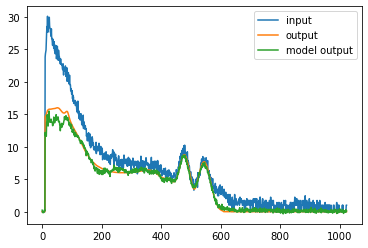

In [54]:
index = 17007
# index = 115

plt.plot(training_input[index:index+1][0], label='input')
plt.plot(training_output[index:index+1][0], label='output')
plt.plot(model.predict(training_input[index:index+1])[0], label='model output')
plt.legend()